In [1]:
import sys
import ast
import pandas as pd
sys.path.append("../src/")
import random
from src.data.data import HuBMapDataModule
from sklearn.model_selection import train_test_split

/home/tamukake/Github/HuBMAP/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
architecuture = "UNET"
num_workers = 10
batch_size = 32
height = 512
width = 512
img_dir = "../data/"
target_name = "blood_vessel"
row_name = "id"
gray_scale = False
pretrained = "imagenet"  # noisy-student
backbone = "timm-efficientnet-b0"
activation = None
in_channels = 3
epochs = 40
warm_up_epohs = 10
dataset_repeat = 8
# gradient_clip_val = 1000
classes = 1
threshold = 0.6
model_mode = "binary"
precision = "16-mixed"  # default 32-true
accumulate_grad_batches = 2
swa_lrs = 1e-4
annealing_epochs = 5
pseudo = False
cutmix_args = {
    "prob": 0.50,
    "enable": True,
    "alpha": 1.0,
    "height": height,
    "width": width,
}
mosaic_args = {"enable": False, "height": height, "width": width, "p": 0.5}
df = pd.read_csv("../data/labels_1class.csv")
unique_id = list(df["id"].unique())
random.shuffle(unique_id)
all_len = len(unique_id)
replace_index = int(all_len * 0.8)
train_id = unique_id[:replace_index]
valid_id = unique_id[replace_index+1:]
meta = pd.read_csv("../data/tile_meta.csv")
# pseudo_label_df = pd.read_csv("./data/dataset3_2stage.csv")
# df = pd.merge(df,pseudo_label_df,how = "outer")
mode = "min"
# train_df, valid_df = train_test_split(df, test_size=0.20, random_state=42)
# train_df = pd.merge(train_df, pseudo_label_df, how="outer").reset_index(drop=True)
# valid_df = valid_df.reset_index(drop=True)
train_df = df[df["id"].isin(train_id)].reset_index(
    drop=True
)
valid_df = df[df["id"].isin(valid_id)].reset_index(
    drop=True
)

In [3]:
datamodule = HuBMapDataModule(
        train_df=train_df,
        valid_df=valid_df,
        img_dir=img_dir,
        height=height,
        width=width,
        target_name=target_name,
        row_mame=row_name,
        batch_size=batch_size,
        num_workers=num_workers,
        cutmix_args=cutmix_args,
        pseudo=pseudo,
        dataset_repeat=dataset_repeat,
        mosaic_args=mosaic_args,
    )

In [4]:
datamodule.setup(stage = "train")
dl = datamodule.train_dataloader()

tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


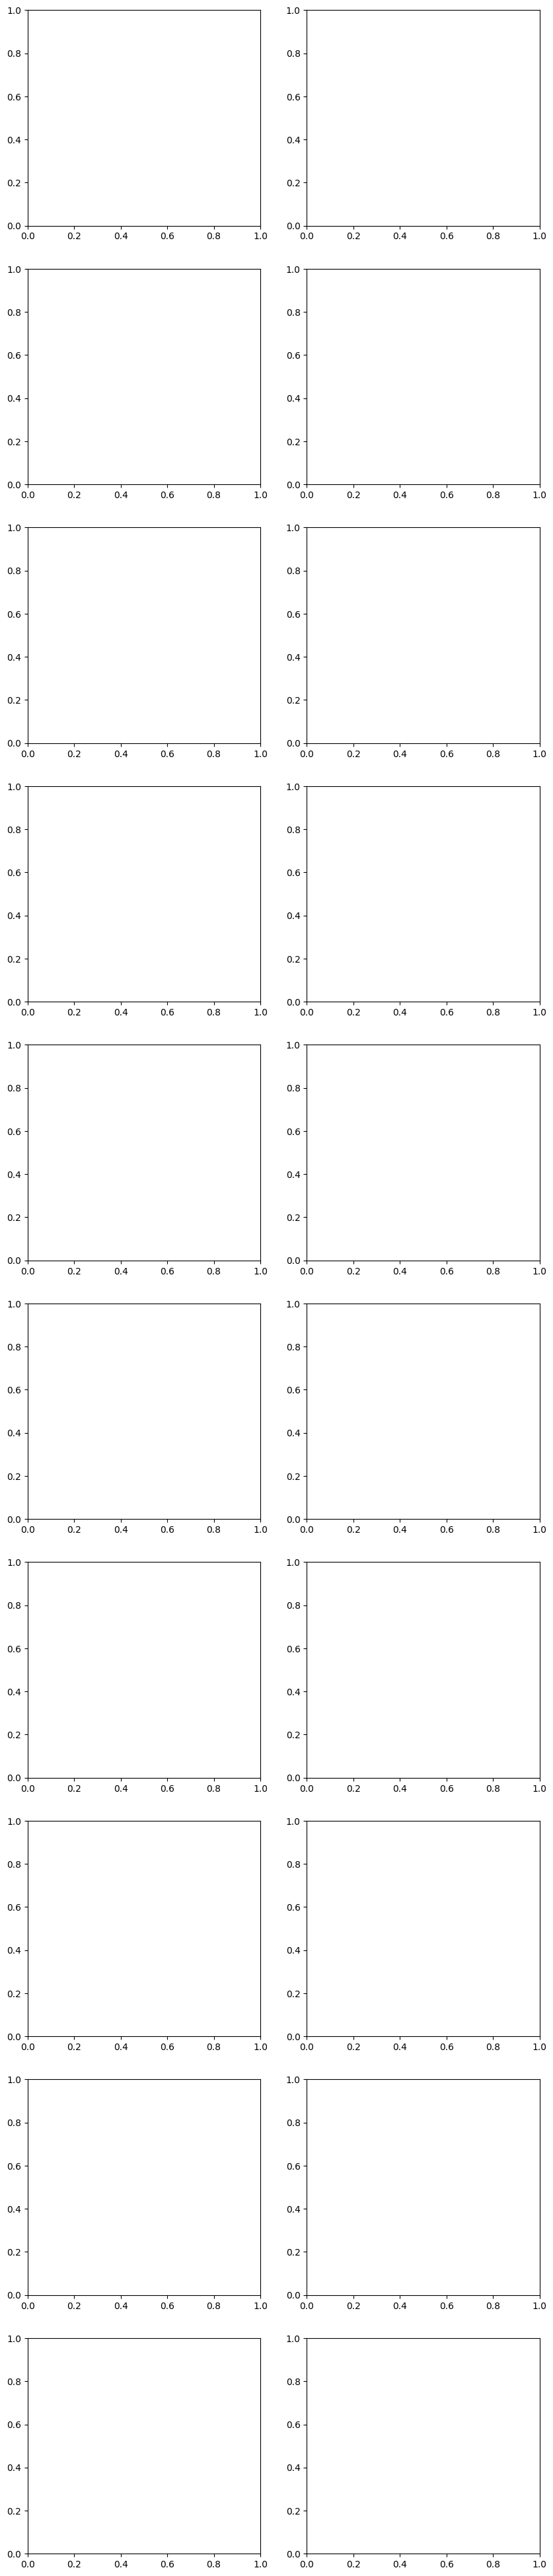

In [5]:
import matplotlib.pyplot as plt
import torch
# 何組の画像を表示するか
num_samples = 10
fig, axs = plt.subplots(num_samples, 2, figsize=(10, num_samples * 5)) 
for i in range(num_samples):
    batch = next(iter(dl))
    images,labels = batch
    print(torch.min(images),torch.max(images))

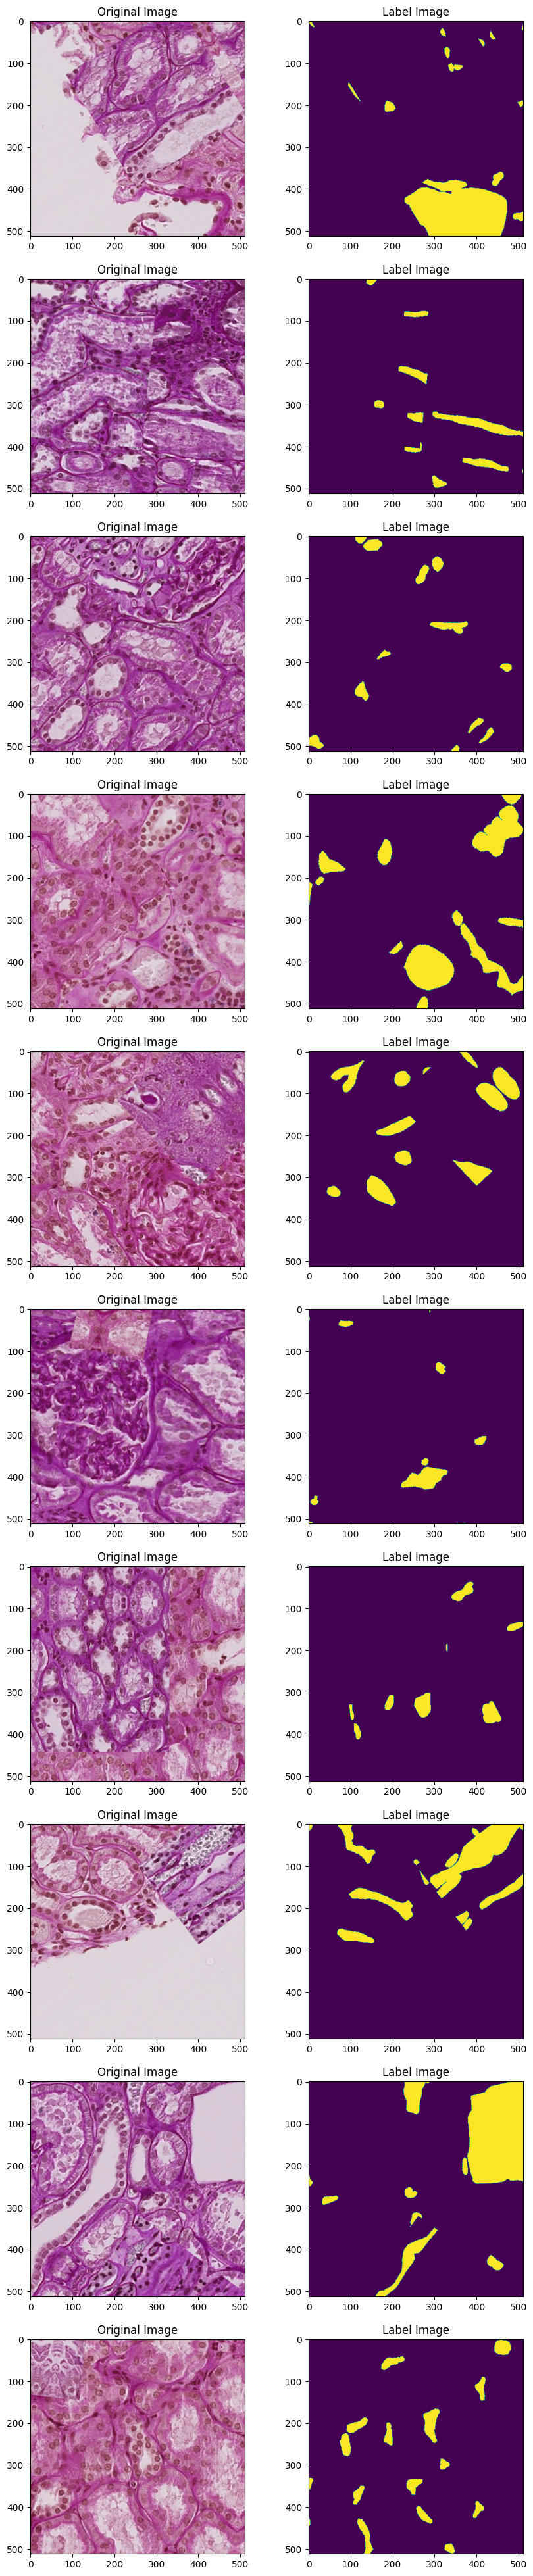

In [6]:
import matplotlib.pyplot as plt
import torch
# 何組の画像を表示するか
num_samples = 10
fig, axs = plt.subplots(num_samples, 2, figsize=(10, num_samples * 5)) 
for i in range(num_samples):
    batch = next(iter(dl))
    images,labels = batch
    
    # 元の画像を表示
    axs[i, 0].imshow(images[0].permute(1, 2, 0))  # もし img が (C, H, W) の形であれば
    axs[i, 0].set_title('Original Image')
    
    # ラベル画像を表示
    axs[i, 1].imshow(labels[0].permute(1, 2, 0))  # もし label_img が (C, H, W) の形であれば
    axs[i, 1].set_title('Label Image')